<a href="https://colab.research.google.com/github/Rogerio-mack/Analise_Exploratoria_de_Dados/blob/main/AED_6_ex_solucao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg"  width=300, align="right">
<br>
<br>
<br>
<br>
<br>

# Análise e Visualização de Dados com Python
---

# Exercícios (Pandas)

## Exercício 1.

Empregue aqui a base de dados `titanic`.

Todos exercícios possuem várias soluções possíveis, mas não se preocupe com isso. A melhor solução é primeiro, a que funciona para você!

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import choices

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


1.1.* Qual a quantidade de linhas e colunas de `titanic`? 

In [ ]:
titanic.shape


(891, 15)

1.2.* Qual a idade do passageiro mais velho?

In [ ]:
titanic.age.max()


80.0

1.3.* Qual a idade da sobrevivente feminina mais velha? 

In [ ]:
titanic[ (titanic.alive == 'yes') & (titanic.sex == 'female') ].age.max()

63.0

1.4.* Qual o percentual de sobreviventes da primeira e terceira classes?

In [ ]:
print('Third Class Survived :' , 
      titanic[ (titanic.alive == 'yes') & (titanic['class'] == 'Third') ].alive.count() / titanic[ (titanic['class'] == 'Third') ].alive.count() )
print('First Class Survived :' , 
      titanic[ (titanic.alive == 'yes') & (titanic['class'] == 'First') ].alive.count() / titanic[ (titanic['class'] == 'First') ].alive.count() )

Third Class Survived : 0.24236252545824846
First Class Survived : 0.6296296296296297


1.5.* Analise a média de idade dos passageiros por classe e sexo (sugestão: empregue groupby). Você pode notar que?

In [ ]:
titanic.groupby(['class','sex']).age.mean()

class   sex   
First   female    34.611765
        male      41.281386
Second  female    28.722973
        male      30.740707
Third   female    21.750000
        male      26.507589
Name: age, dtype: float64

# Exercícios (Matplotlib)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Exercício 2

2.1.* Examine graficamente as funções,

$$ y(t) = e^{-t} $$
$$ y(t) = e^{-t} cos(2 \pi t) $$
$$ y(t) = e^{-|t|} sin(t) $$

Qual delas apresenta evolução monotonicamente (sempre em um único sentido) decrescente? 




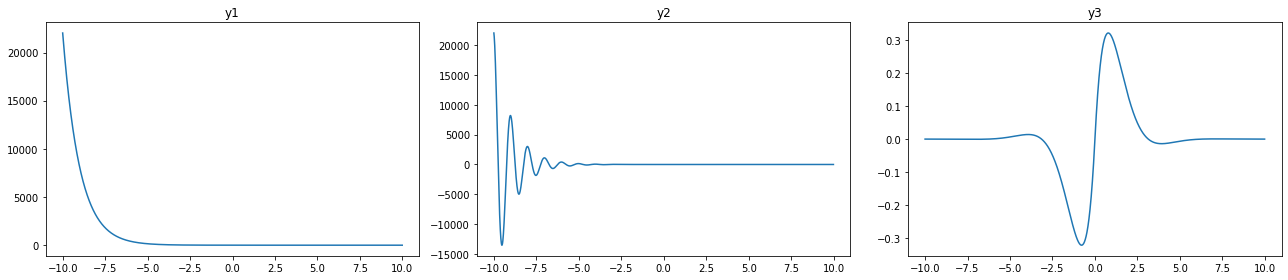

In [ ]:
import numpy as np

import matplotlib.pyplot as plt             
%matplotlib inline

plt.figure(figsize=(18,4))

t = np.arange(-10,10,0.01)

y = np.exp(-t)
plt.subplot(1,3,1)
plt.plot(t,y,label='y1')
plt.title('y1')

y = np.exp(-t)*np.cos(2*np.pi*t)
plt.subplot(1,3,2)
plt.plot(t,y,label='y2')
plt.title('y2')

y = np.exp(-np.abs(t))*np.sin(t)
plt.subplot(1,3,3)
plt.plot(t,y,label='y3')
plt.title('y3')

plt.tight_layout()
plt.show()
# resposta, função 1.

2.2.* Examine a distribuição de idades dos passageiros de `Titanic`,

graficamente você identifica que tipo de distruibuição de idades? 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


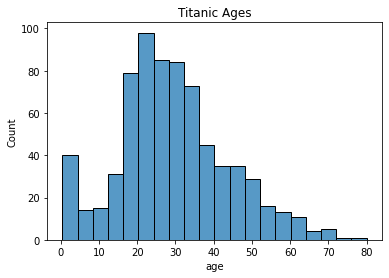

In [ ]:
titanic = sns.load_dataset('titanic')
display(titanic.head())

sns.histplot(titanic.age)
plt.title('Titanic Ages - Distribuição em Calda à Direita')
plt.show()


2.3. **Despolarização neural**. Empregue o dataset `dots`. Veja o gráfico abaixo para entender o que é a fase de **despolarização**. Produza então um gráfico para examinar quanto dura aproximadamente a despolarização de um neurônio do tipo = choice 'T2' e align 'dots'. 

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/4/4a/Action_potential.svg/300px-Action_potential.svg.png" width=300, align="center"> 

In [ ]:
import seaborn as sns
df = sns.load_dataset('dots')
df.head()


,align,choice,time,coherence,firing_rate
0,dots,T1,-80,0.0,33.189967
1,dots,T1,-80,3.2,31.691726
2,dots,T1,-80,6.4,34.279840
3,dots,T1,-80,12.8,32.631874
4,dots,T1,-80,25.6,35.060487


In [ ]:
# Podemos primeiro fazer a seleção dos dados de interesse

df = df[(df.choice == 'T2') & (df['align'] == 'dots')]


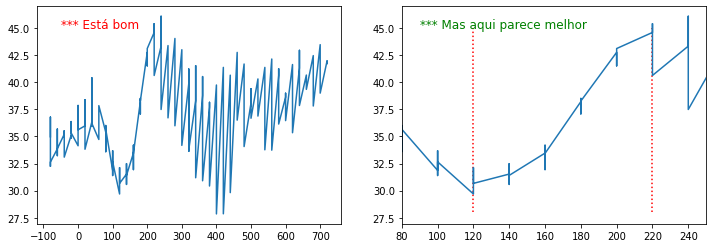

In [ ]:
# O gráfico de linhas do Matplotlib não é uma boa solução para lidar com muitos pontos para um mesmo valor de x

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(df.time, df.firing_rate)
plt.text(-50, 45, '*** Está bom',c='red',fontsize=12)

plt.subplot(1,2,2)
plt.plot(df.time, df.firing_rate)
plt.xlim([80,250])
plt.vlines(120,28,45,linestyles='dotted',color='red')
plt.vlines(220,28,45,linestyles='dotted',color='red')
plt.text(90, 45, '*** Mas aqui parece melhor',c='green',fontsize=12)

plt.show()

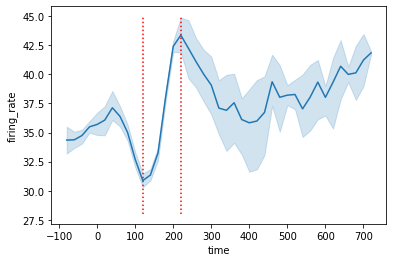

In [ ]:
# E o Seaborn aqui oferece uma solução melhor

sns.lineplot(x=df.time, y=df.firing_rate)
plt.vlines(120,28,45,linestyles='dotted',color='red')
plt.vlines(220,28,45,linestyles='dotted',color='red')
plt.show()

2.4.* **Tendência de Valores da Bolsa**. Analisando graficamente os índices da Bolsa da base abaixo, qual ou quais índices apresentam tendência (movimentos de alta e baixa) discrepantes com relação ao IBOV no período? 

In [ ]:
import pandas as pd
df = pd.read_csv('http://meusite.mackenzie.br/rogerio/data_load/bovespa2020_2021.csv')
df.head()

,data,IBOV,VALE3,PETR4,DOLAR
0,2020-01-02,118573.0,13.45,16.270000,4.0163
1,2020-01-03,117707.0,13.29,15.990000,4.0234
2,2020-01-06,116878.0,13.14,16.219999,4.0570
3,2020-01-07,116662.0,13.23,16.059999,4.0604
4,2020-01-08,116247.0,13.22,15.700000,4.0662


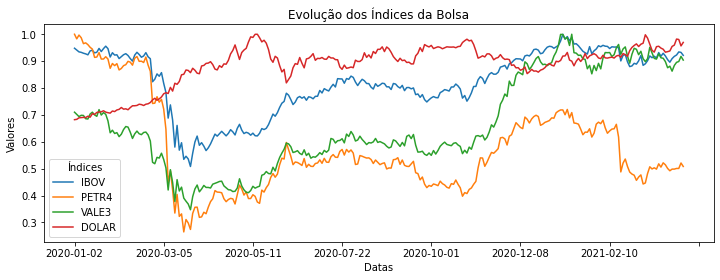

In [ ]:
# Solução  
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt             
%matplotlib inline

import matplotlib.ticker as ticker

df.IBOV = df.IBOV / max(df.IBOV)
df.PETR4 = df.PETR4 / max(df.PETR4)
df.VALE3 = df.VALE3 / max(df.VALE3)
df.DOLAR = df.DOLAR / max(df.DOLAR)

fig, ax = plt.subplots(figsize=(12,4))
ax.plot('data','IBOV',data=df)        
ax.plot('data','PETR4',data=df) 
ax.plot('data','VALE3',data=df) 
ax.plot('data','DOLAR',data=df) 
ax.xaxis.set_major_locator(ticker.MaxNLocator(10))
plt.title('Evolução dos Índices da Bolsa')
plt.xlabel('Datas')                           
plt.ylabel('Valores')

plt.legend(title='Índices')

plt.show()

2.5.* **Buscando Correlações.** Considere os valores numéricos de `mpg` (abaixo). Construa um gráfico que permita você observar a correlação dos dados com relação a valor de `mpg` (milhas por galão) e responder que atributos apresentam correlação negativa e valores aproximadamente inferiores a  $-0.7$.

In [ ]:
import seaborn as sns
df = sns.load_dataset('mpg')
df.head()



,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


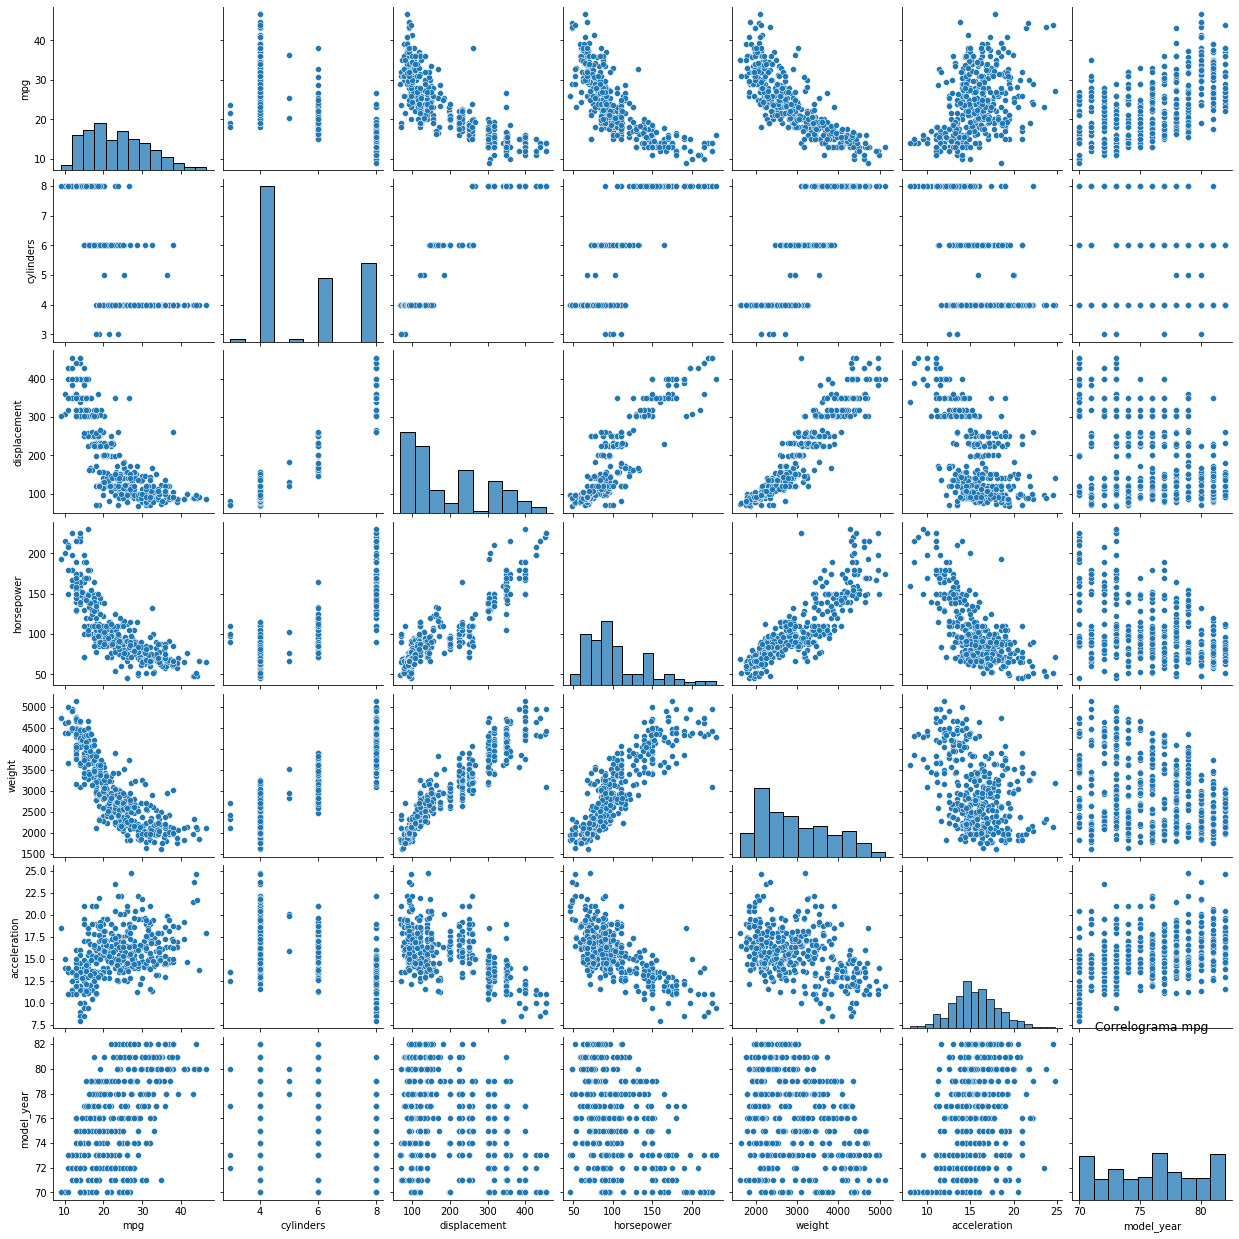

In [ ]:
sns.pairplot(df.drop(columns=['origin','name']))
plt.title('Correlograma mpg')
plt.show()

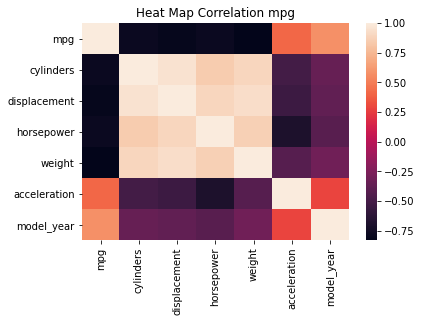

In [ ]:
sns.heatmap(df.drop(columns=['origin','name']).corr())
plt.title('Heat Map Correlation mpg')
plt.show()

In [ ]:
df.drop(columns=['origin','name']).corr()['mpg']

mpg             1.000000
cylinders      -0.775396
displacement   -0.804203
horsepower     -0.778427
weight         -0.831741
acceleration    0.420289
model_year      0.579267
Name: mpg, dtype: float64